In [91]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
%matplotlib inline

from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller #for Augmented Dickey fuller test
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

from statsmodels.graphics.tsaplots import plot_acf #For Autocorrelation
from statsmodels.graphics.tsaplots import plot_pacf #For Partial Autocorrelation

import statsmodels.api as sm

from pandas.plotting import register_matplotlib_converters

from pandas.plotting import autocorrelation_plot

import warnings
warnings.filterwarnings("ignore")

register_matplotlib_converters()

In [2]:
%pwd

'C:\\Users\\jsingh\\Desktop\\Work\\SalesPrediction'

In [3]:
df=pd.read_csv('SalesOrder2018.csv')

In [5]:
df

,Date,Orders
0,1-2018,14375.67
1,2-2018,15635.32
2,3-2018,13526.79
3,4-2018,19046.00
4,5-2018,11703.39
5,6-2018,30758.99
6,7-2018,28804.88
7,8-2018,17307.73
8,9-2018,33468.42
9,10-2018,17646.19


In [4]:
df.head()

,Date,Orders
0,1-2018,14375.67
1,2-2018,15635.32
2,3-2018,13526.79
3,4-2018,19046.00
4,5-2018,11703.39


In [6]:
df.tail()

,Date,Orders
32,9-2020,20597.52
33,10-2020,81762.00
34,11-2020,43255.55
35,12-2020,33082.96
36,1-2021,34195.00


In [7]:
# Converting Date into Datetime format
df['Date']=pd.to_datetime(df['Date'])

In [8]:
df.head()

,Date,Orders
0,2018-01-01,14375.67
1,2018-02-01,15635.32
2,2018-03-01,13526.79
3,2018-04-01,19046.00
4,2018-05-01,11703.39


In [9]:
df.to_csv('SalesOrder2018-New.csv', index = False)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    37 non-null     datetime64[ns]
 1   Orders  37 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 720.0 bytes


In [11]:
df.describe()

,Orders
count,37.000000
mean,33400.916216
std,23359.345363
min,11703.390000
25%,17307.730000
50%,22161.030000
75%,37685.030000
max,87860.080000


In [12]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Orders', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:Blue', marker='o')
    plt.show()

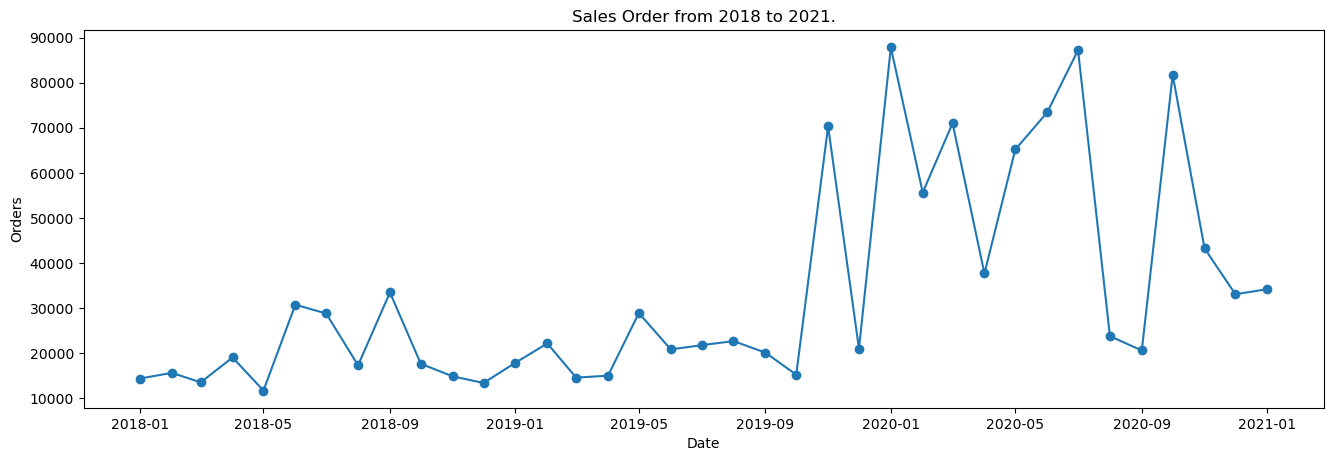

In [13]:

plot_df(df, x=df.Date, y=df.Orders,title='Sales Order from 2018 to 2021.')

In [14]:
df['Year'] = [d.year for d in df.Date]
df['Month'] = [d.strftime('%b') for d in df.Date]
years = df['Year'].unique()

In [15]:
df.head()

,Date,Orders,Year,Month
0,2018-01-01,14375.67,2018,Jan
1,2018-02-01,15635.32,2018,Feb
2,2018-03-01,13526.79,2018,Mar
3,2018-04-01,19046.00,2018,Apr
4,2018-05-01,11703.39,2018,May


In [16]:
#Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)


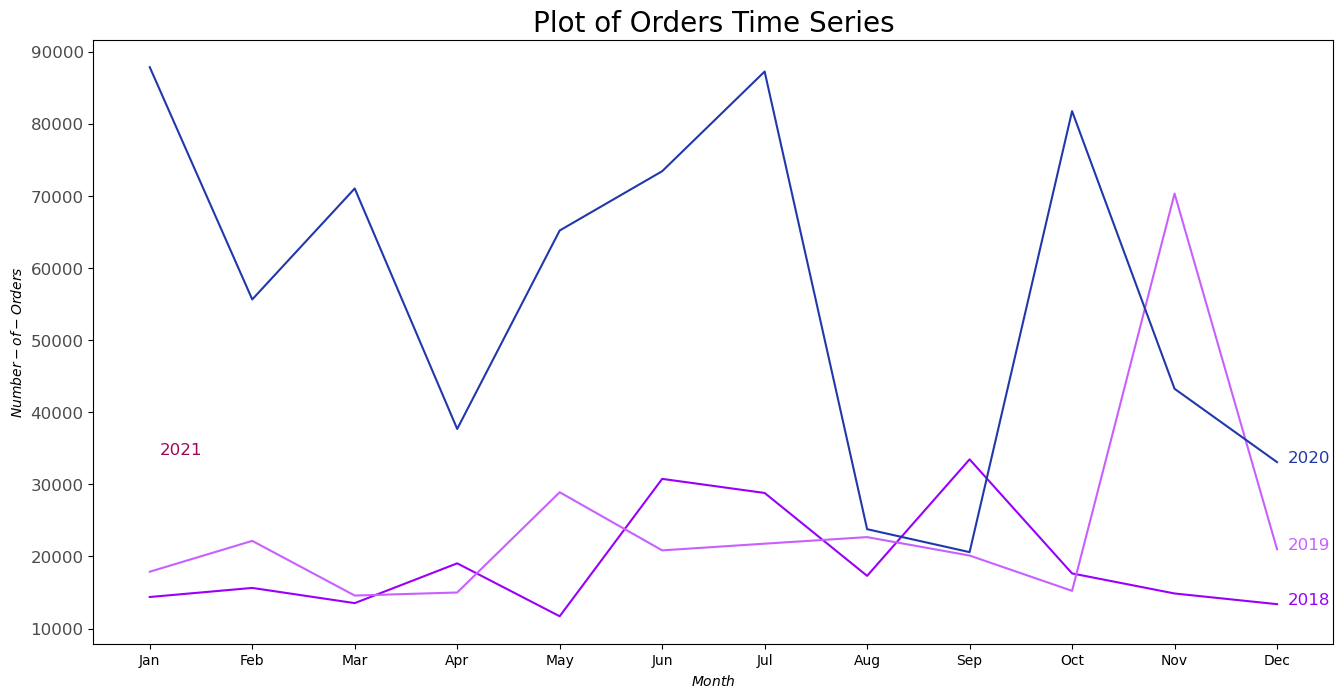

In [17]:
#Plot
plt.figure(figsize=(16,8), dpi= 100)
for i, y in enumerate(years):
    if i >= 0:        
        plt.plot('Month', 'Orders', data=df.loc[df.Year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.Year==y, :].shape[0]-.9, df.loc[df.Year==y, 'Orders'][-1:].values[0], y, fontsize=12, color=mycolors[i])


# Decoration
plt.gca().set(ylabel='$Number-of-Orders$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Plot of Orders Time Series", fontsize=20)
plt.show()

<AxesSubplot:xlabel='Month', ylabel='Orders'>

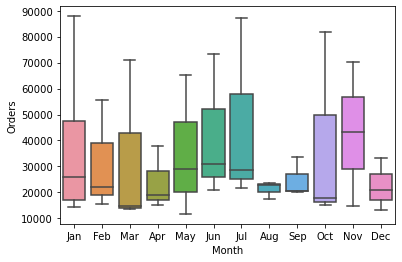

In [18]:
#Month-wise trend
sns.boxplot(x='Month', y='Orders', data=df)

In [19]:
df_series= df[["Date", "Orders"]].copy()

In [20]:
#Setting Date column as the Index of the data frame
df_series.set_index('Date',inplace=True)

In [21]:
df_series.head()

,Orders
Date,
2018-01-01,14375.67
2018-02-01,15635.32
2018-03-01,13526.79
2018-04-01,19046.00
2018-05-01,11703.39


### Decomposing time series into it's components

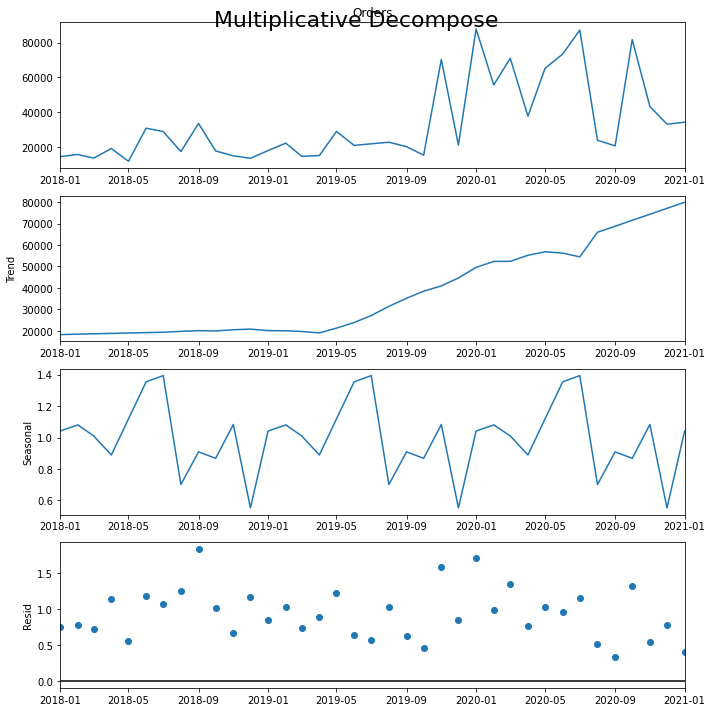

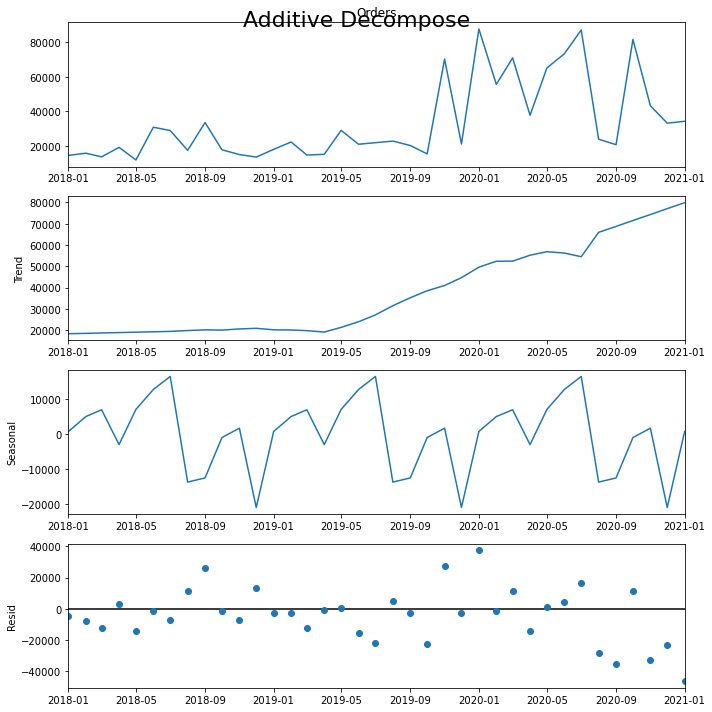

In [81]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df_series['Orders'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df_series['Orders'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

### Let's check if the timeseries is stationary.

Using Augmented Dickey Fuller(ADF) TEST

The null hypothesis for this test is that there is a unit root(not stationary).


The alternate hypothesis is that the time series is stationary (or trend-stationary).

ARIMA depend on the values p, d, q

p = number of lags, AR terms

d = order of differencing

q = number of lagged forecast errors, MA terms

In [82]:
#Ho: It is non stationary
#H1: It is stationary

def adf_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [83]:
adf_test(df_series)

ADF Test Statistic : -1.186337031621131
p-value : 0.6794453883588092
#Lags Used : 3
Number of Observations Used : 33
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Since the p-value is 0.679 which is greater than significance level (0.05). Therefore, we cannot reject the null hypothesis that your time-series is non-stationary.

So, we need to do differencing in order to make timeseries stationary

### Differencing

In [84]:
df_series["Orders First Difference"]=df_series["Orders"]-df_series["Orders"].shift(1)

In [141]:
df_series["Orders Second Difference"]=df_series["Orders"]-df_series["Orders"].shift(2)

In [142]:
df_series

,Orders,Orders First Difference,Orders Second Difference
Date,,,
2018-01-01,14375.67,NaN,NaN
2018-02-01,15635.32,1259.65,NaN
2018-03-01,13526.79,-2108.53,-848.88
2018-04-01,19046.00,5519.21,3410.68
2018-05-01,11703.39,-7342.61,-1823.40
2018-06-01,30758.99,19055.60,11712.99
2018-07-01,28804.88,-1954.11,17101.49
2018-08-01,17307.73,-11497.15,-13451.26
2018-09-01,33468.42,16160.69,4663.54


In [88]:
## Again test dickey fuller test
adf_test(df_series['Orders First Difference'].dropna())

ADF Test Statistic : -6.3633599173871795
p-value : 2.4435131078643742e-08
#Lags Used : 2
Number of Observations Used : 33
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


Now, we can see that p-value is less than 0.05. Therefore, there is no Unit root and the Data is Stationary after doing first order differencing

<AxesSubplot:xlabel='Date'>

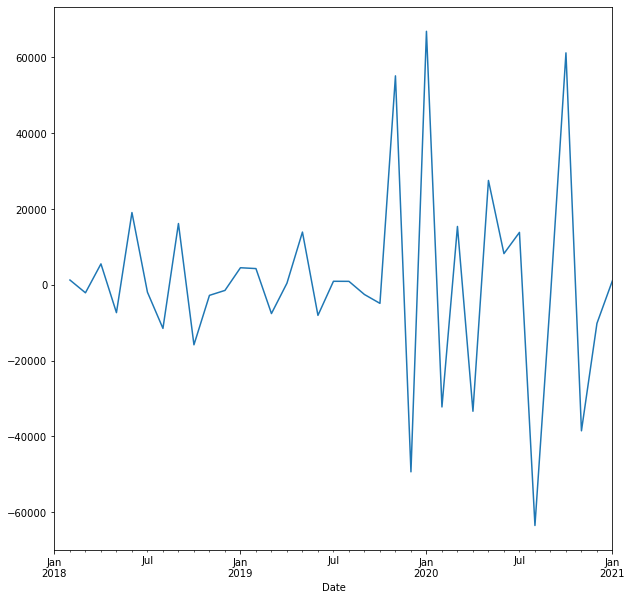

In [89]:
df_series['Orders First Difference'].plot()

In [143]:
## Again testing dickey fuller test
adf_test(df_series['Orders Second Difference'].dropna())

ADF Test Statistic : -7.689185059916609
p-value : 1.4343913599733305e-11
#Lags Used : 1
Number of Observations Used : 33
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Date'>

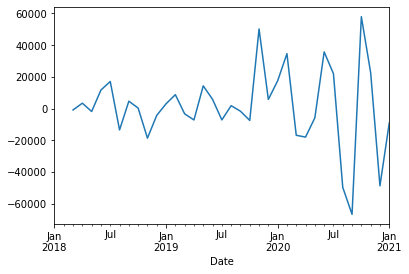

In [144]:
df_series['Orders Second Difference'].plot()

We can see know that the data looks stationary now. But, there is some (small) vairance as well.

### Autocorrelation and Partial Autocorrelation

- Identification of an AR model is often best done with the PACF.
   - For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
   

- Identification of an MA model is often best done with the ACF rather than the PACF.
  - For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

In [ ]:
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(311)
fig = plot_acf(df_series, ax=ax1,
               title="Autocorrelation on Original Series") 
ax2 = fig.add_subplot(312)
fig = plot_acf(df_series.diff().dropna(), ax=ax2, 
               title="1st Order Differencing")
ax3 = fig.add_subplot(313)
fig = plot_acf(df_series.diff().diff().dropna(), ax=ax3, 
               title="2nd Order Differencing")


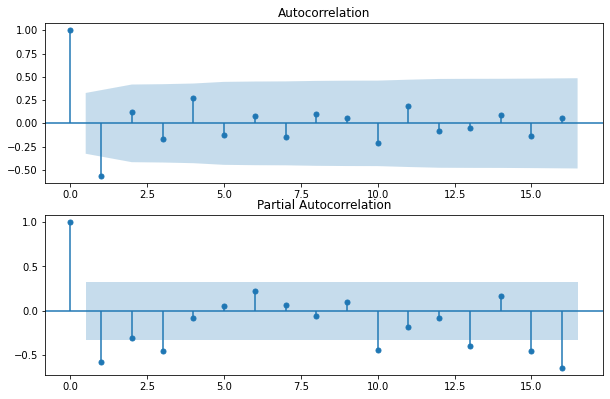

In [97]:
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(311)
fig = sm.graphics.tsa.plot_acf(df_series['Orders First Difference'].dropna(),ax=ax1)

ax2 = fig.add_subplot(312)
fig = sm.graphics.tsa.plot_pacf(df_series['Orders First Difference'].dropna(),ax=ax2)

Autocorreclation(MA)/ q= 1
Partial Autocorrelation(AR)/ p=0
d=1 (Since we did only 1 differencing)

In [136]:
model=ARIMA(df_series['Orders'],order=(0,1,1))
model_fit=model.fit()

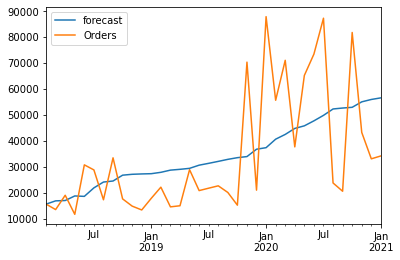

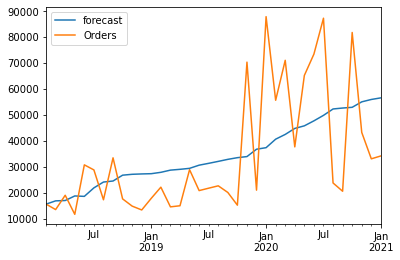

In [140]:
model_fit.plot_predict(1, 36)

#### Autocorrelation
Finding out the order of differencing, <strong>d</strong>, using auto correlation:

Rule 1: If the series has positive autocorrelations out to a high number of lags (say, 10 or more), then it probably needs a higher order of differencing.


Rule 2: If the lag-1 autocorrelation is zero or negative, or the autocorrelations are all small and patternless, then the series does not need a higher order of differencing. If the lag-1 autocorrelation is -0.5 or more negative, the series may be overdifferenced.  BEWARE OF OVERDIFFERENCING.

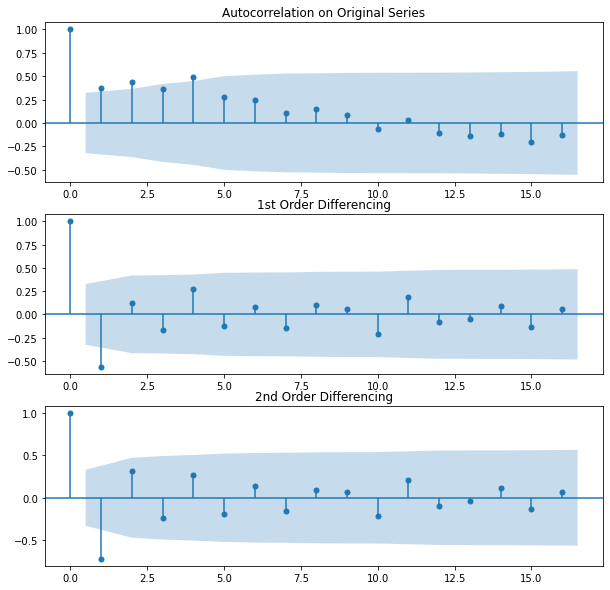

In [23]:
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(311)
fig = plot_acf(df_series, ax=ax1,
               title="Autocorrelation on Original Series") 
ax2 = fig.add_subplot(312)
fig = plot_acf(df_series.diff().dropna(), ax=ax2, 
               title="1st Order Differencing")
ax3 = fig.add_subplot(313)
fig = plot_acf(df_series.diff().diff().dropna(), ax=ax3, 
               title="2nd Order Differencing")


<strong> The timeseries is stationary at d = 1 where only the first lag is above the significance level

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

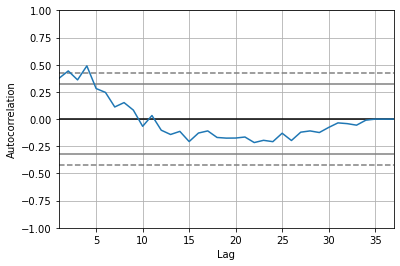

In [24]:
#autocorrelation plot for time series
autocorrelation_plot(df_series)


There is a positive correlation with first 8-9 lags, which looks significant for first 4 lags

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 17 must be < 17.

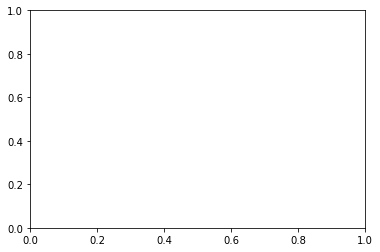

In [135]:
plot_pacf(df_series.diff().dropna(), lags=17)

In [134]:
model = ARIMA(df_series, order=(0, 1, 1))
results = model.fit()
results.plot_predict(1, 12)

ValueError: endog is required to have ndim 1 but has ndim 2

from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_series, order=(1, 1, 1))
results = model.fit()
results.plot_predict(1, 100)

In [42]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Orders   No. Observations:                   36
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -407.594
Method:                       css-mle   S.D. of innovations          19014.557
Date:                Mon, 08 Feb 2021   AIC                            821.188
Time:                        10:08:12   BIC                            825.938
Sample:                    02-01-2018   HQIC                           822.846
                         - 01-01-2021                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1253.5038    292.774      4.281      0.000     679.677    1827.331
ma.L1.D.Orders    -1.0000      0.133     -7.491      0.000      -1.262      -0.738
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [55]:
df_series.head()

,Orders
Date,
2018-01-01,14375.67
2018-02-01,15635.32
2018-03-01,13526.79
2018-04-01,19046.00
2018-05-01,11703.39


In [57]:
import pmdarima as pm

In [98]:
def arimamodel(df_series):
    automodel = pm.auto_arima(df_series, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              seasonal=False,
                              trace=True)
    return automodel

In [99]:
def plotarima(n_periods, df_series, automodel):
    # Forecast
    fc, confint = automodel.predict(n_periods=n_periods, 
                                    return_conf_int=True)
    # mONTHLY index
    fc_ind = pd.date_range(df_series.index[df_series.shape[0]-1], 
                           periods=n_periods, freq="M")
    # Forecast series
    fc_series = pd.Series(fc, index=fc_ind)
    # Upper and lower confidence bounds
    lower_series = pd.Series(confint[:, 0], index=fc_ind)
    upper_series = pd.Series(confint[:, 1], index=fc_ind)
    # Create plot
    plt.figure(figsize=(10, 6))
    plt.plot(df_series)
    plt.plot(fc_series, color="red")
    plt.xlabel("date")
    plt.ylabel(df_series.name)
    plt.fill_between(lower_series.index, 
                     lower_series, 
                     upper_series, 
                     color="k", 
                     alpha=0.25)
    plt.legend(("past", "forecast", "95% confidence interval"),  
               loc="upper left")
    plt.show()

In [100]:
stepwise_fit=auto_arima(df_series["Orders"],trace=True, suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=826.631, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=837.896, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=826.371, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=821.934, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=835.926, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=822.434, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=823.283, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=824.683, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=819.775, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=820.703, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=821.159, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=824.454, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=821.880, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.958 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   37
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -407.887
Date:                Tue, 09 Feb 2021   AIC                            819.775
Time:                        11:20:58   BIC                            822.942
Sample:                             0   HQIC                           820.880
                                 - 37                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7024      0.108     -6.520      0.000      -0.914      -0.491
sigma2      4.191e+08   1.81e-11   2.31e+19      0.000    4.19e+08    4.19e+08
===================================================================================
Ljung-Box (L1) (Q):                   1.02   Jarque-Bera (JB):                 3.77
Prob(Q):                              0.31   Prob(JB):                         0.15
Heteroskedasticity (H):               8.55   Skew:                             0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.57e+35. Standard errors may be unstable.
"""

In [101]:
automodel = arimamodel(df_series)
plotarima(70, df_series, automodel)

ValueError: y should be a 1d array, got an array of shape (37, 2) instead.